In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('DS_Assignment.xlsx')

In [3]:
data.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
1,4.0,43.0,round,circumscribed,NaN,1
2,5.0,58.0,irregular,spiculated,low,1
3,4.0,28.0,round,circumscribed,low,0
4,5.0,74.0,round,spiculated,NaN,1


In [4]:
#Understanding our dataset
data.describe()

,BI_RADS,Age,Severity
count,959.000000,861.000000,961.000000
mean,4.348279,55.860627,0.463059
std,1.783031,16.969647,0.498893
min,0.000000,5.000000,0.000000
25%,4.000000,45.000000,0.000000
50%,4.000000,56.000000,0.000000
75%,5.000000,66.000000,1.000000
max,55.000000,130.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       959 non-null    float64
 1   Age           861 non-null    float64
 2   Shape         930 non-null    object 
 3   Margin        913 non-null    object 
 4   Mass_Density  885 non-null    object 
 5   Severity      961 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 45.2+ KB


In [6]:
# Checking number of missing values in BI_RADS
data['BI_RADS'].isnull().sum()

2

In [7]:
# Checking the number of missing values in Age variable
data['Age'].isnull().sum()

100

In [8]:
# Checking the number of missing values in Severity variable
data['Severity'].isnull().sum()

0

In [9]:
# Checking the number of missing values or NaN  Values in Mass_Density variable
data['Mass_Density'].isnull().sum()

76

In [10]:
# Checking the correlation between different varibbles in our dataset
data.corr()

,BI_RADS,Age,Severity
BI_RADS,1.000000,0.092898,0.231601
Age,0.092898,1.000000,0.408413
Severity,0.231601,0.408413,1.000000


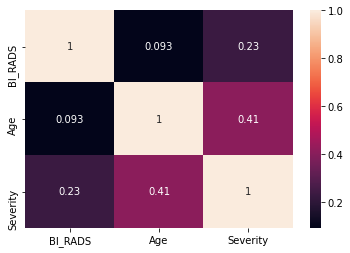

In [11]:
import seaborn as sn
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
data["BI_RADS"].isna().sum()

2

In [13]:
# Fill the BI_RADS missing values with forward fill
data["BI_RADS"] = data["BI_RADS"].fillna(method="ffill")

In [14]:
data['BI_RADS'].isnull().sum()

0

<AxesSubplot:xlabel='BI_RADS'>

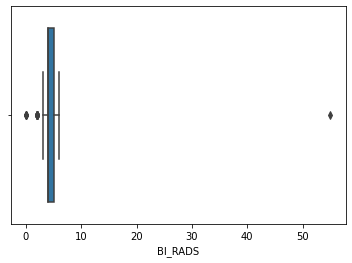

In [15]:
#Finding the outliers in BI_RADS
import seaborn as sns
sns.boxplot(x=data['BI_RADS'])

In the above figure we can clearly see that we have 3 outliers for BI_RADS Variable

In [16]:
Q1=data['BI_RADS'].quantile(0.25)
Q3=data['BI_RADS'].quantile(0.75)
IQR=Q3-Q1
print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR :",IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print("Lower_Whisker :",Lower_Whisker,"Upper_Whisker :" ,Upper_Whisker)

Q1 : 4.0
Q3 : 5.0
IQR : 1.0
Lower_Whisker : 2.5 Upper_Whisker : 6.5


In [17]:
#Applying conditin to remove the outlier
data = data[data['BI_RADS']< Upper_Whisker]

In [18]:
#Applying conditin to remove the outlier
data = data[data['BI_RADS']> Lower_Whisker]

<AxesSubplot:xlabel='BI_RADS'>

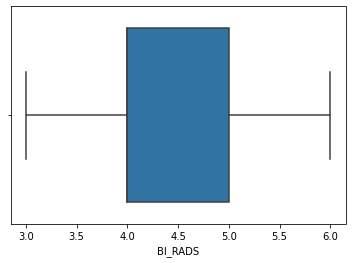

In [19]:
# Checking if the outliers are removed from BI_RADS
sns.boxplot(x=data['BI_RADS'])

In the above figure we can see that we managed to successfully remove the outliers from BI_RADS

In [20]:
data['BI_RADS'].shape

(941,)

In [21]:
data['Age'].isna().sum()

99

In [22]:
mean = data['Age'].mean()

In [23]:
data['Age'] = data['Age'].fillna(mean)

In [24]:
data['Age'].isna().sum()

0

<AxesSubplot:xlabel='Age'>

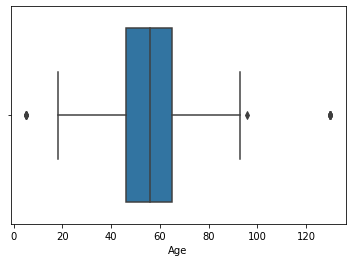

In [25]:
# Outliers in Age column
sns.boxplot(x=data['Age'])

From the above figure we can conclude that Age column has 2 outliers

In [26]:
Q1=data['Age'].quantile(0.25)
Q3=data['Age'].quantile(0.75)
IQR=Q3-Q1
print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR :",IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print("Age_Lower_Whisker :",Lower_Whisker,"Age_Upper_Whisker :" ,Upper_Whisker)

Q1 : 46.0
Q3 : 65.0
IQR : 19.0
Age_Lower_Whisker : 17.5 Age_Upper_Whisker : 93.5


In [27]:
#Applying conditin to remove the outliers from Age column
data = data[data['Age']< Upper_Whisker]

In [28]:
#Applying conditin to remove the outliers from Age column
data = data[data['Age']> Lower_Whisker]

<AxesSubplot:xlabel='Age'>

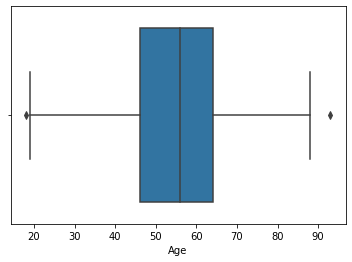

In [29]:
# Checking if the outliers are removed from Age column
sns.boxplot(x=data['Age'])

From the above figure we can declare that we have successfully managed to get rid of outlier values from Age column

In [30]:
# Checking how many values do we have for each BI_RADS score present in our dataset
data['BI_RADS'].value_counts()

4.0    544
5.0    331
3.0     36
6.0     11
Name: BI_RADS, dtype: int64

In [31]:
# Checking Margin distribution for number of people we have in our dataset
data['Margin'].value_counts()

circumscribed     342
ill-defined       269
spiculated        131
obscured          111
microlobulated     23
Name: Margin, dtype: int64

In [32]:
# Checking Mass_Density distribution for number of people we have in our dataset
data['Mass_Density'].value_counts()

low               769
iso                54
high               15
fat-containing     11
Name: Mass_Density, dtype: int64

In [33]:
def plot_bar_chart(x_column, hue, data):
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.countplot(x=x_column, data=data)
    plt.title("{} Types Count".format(x_column))
    plt.subplot(1,2,2)
    sns.countplot(x=x_column, hue=hue, data=data)
    plt.title("{} vs {}".format(x_column, hue))
    plt.show()

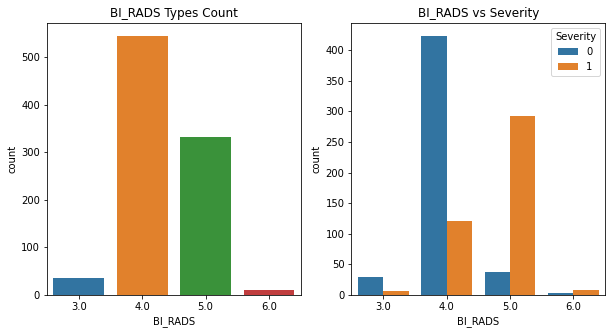

In [34]:
plot_bar_chart("BI_RADS", "Severity", data)

From the above figure we can depict that BI_RADS score 4 and 5 imply severity of disease.

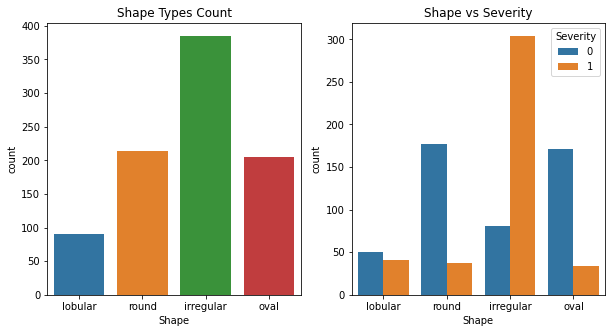

In [35]:
plot_bar_chart("Shape", "Severity", data)

Shape vs Sevirity plot implies that the irregular shape of the tumour has severe consequences

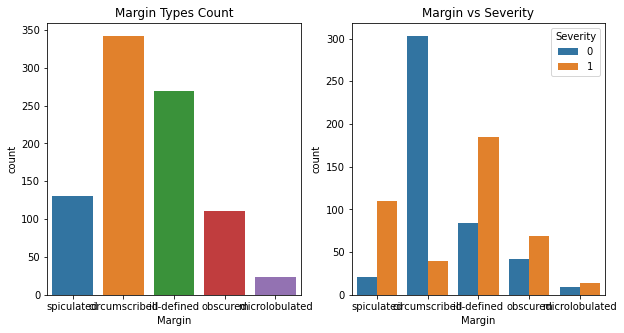

In [36]:
plot_bar_chart("Margin", "Severity", data)

c:\users\nitin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


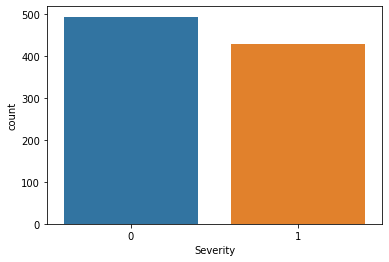

In [37]:
sns.countplot("Severity", data=data)
plt.show()

The above plots show how the data is distributed for every variable and also show the impact of every variable on Severity

c:\users\nitin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


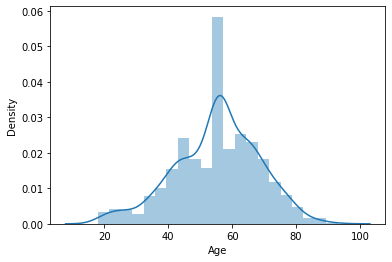

In [38]:
sns.distplot(data["Age"])
plt.show()

In [39]:
data.isna().sum()

BI_RADS          0
Age              0
Shape           27
Margin          46
Mass_Density    73
Severity         0
dtype: int64

In [40]:
severity = data[data["Severity"] == 1]
non_severity = data[data["Severity"] == 0]

In [41]:
severity_margin = severity[severity["Margin"] == "spiculated"]

In [42]:
severity_margin

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
2,5.0,58.0,irregular,spiculated,low,1
4,5.0,74.0,round,spiculated,NaN,1
8,5.0,57.0,round,spiculated,low,1
9,5.0,60.0,NaN,spiculated,high,1
...,...,...,...,...,...,...
910,4.0,77.0,irregular,spiculated,low,1
912,4.0,50.0,irregular,spiculated,low,1
951,5.0,67.0,irregular,spiculated,low,1
957,4.0,56.0,irregular,spiculated,low,1


In [43]:
#Check which category has highest value count for both severe and non-severe cases
severity[severity["Mass_Density"].isna()]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
1,4.0,43.000000,round,circumscribed,NaN,1
4,5.0,74.000000,round,spiculated,NaN,1
38,4.0,48.000000,irregular,spiculated,NaN,1
45,5.0,44.000000,oval,ill-defined,NaN,1
59,5.0,59.000000,oval,NaN,NaN,1
67,5.0,72.000000,irregular,obscured,NaN,1
74,5.0,70.000000,NaN,ill-defined,NaN,1
84,5.0,51.000000,irregular,NaN,NaN,1
106,4.0,44.000000,round,circumscribed,NaN,1
109,5.0,55.902613,irregular,ill-defined,NaN,1


In [44]:
severity_margin["Mass_Density"].value_counts()

low               102
iso                 3
fat-containing      1
high                1
Name: Mass_Density, dtype: int64

In [45]:
non_severity[non_severity["Mass_Density"].isna()]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
19,4.0,40.000000,round,NaN,NaN,0
22,4.0,43.000000,round,NaN,NaN,0
35,4.0,77.000000,lobular,NaN,NaN,0
40,4.0,59.000000,oval,circumscribed,NaN,0
43,4.0,61.000000,oval,circumscribed,NaN,0
47,4.0,23.000000,round,circumscribed,NaN,0
52,4.0,23.000000,round,circumscribed,NaN,0
53,4.0,63.000000,oval,circumscribed,NaN,0
55,4.0,43.000000,lobular,ill-defined,NaN,0
57,5.0,51.000000,oval,ill-defined,NaN,0


In [85]:
severity_margin["Shape"].value_counts()

irregular    90
lobular       7
round         7
oval          1
Name: Shape, dtype: int64

In [86]:
non_severity["Shape"].value_counts()

round        177
oval         171
irregular     81
lobular       50
Name: Shape, dtype: int64

In [46]:
non_severity["Mass_Density"].value_counts()

low               391
iso                37
high                8
fat-containing      6
Name: Mass_Density, dtype: int64

In [47]:
data['Shape'] = data['Shape'].fillna('irregular')

In [48]:
data['Margin'] = data['Margin'].fillna('ill-defined')

In [49]:
data['Shape'].isna().sum()

0

In [50]:
data['Margin'].isna().sum()

0

In [51]:
severity[severity["Mass_Density"] == "high"]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
9,5.0,60.000000,NaN,spiculated,high,1
20,4.0,66.000000,NaN,NaN,high,1
21,5.0,56.000000,irregular,obscured,high,1
258,5.0,55.902613,irregular,ill-defined,high,1
685,5.0,40.000000,irregular,circumscribed,high,1
823,4.0,55.902613,round,circumscribed,high,1
891,4.0,42.000000,round,circumscribed,high,1


In [52]:
data['BI_RADS'].isna().sum()

0

In [53]:
data.isna().sum()

BI_RADS          0
Age              0
Shape            0
Margin           0
Mass_Density    73
Severity         0
dtype: int64

In [54]:
data['BI_RADS'].shape

(922,)

In [55]:
# Chi-squared test for BI_RADS
from scipy import stats

bi_rads_cross_tab = pd.crosstab(index=data["BI_RADS"], columns=data["Severity"])

(chi, p, dof, _) = stats.chi2_contingency([bi_rads_cross_tab.iloc[0].values, bi_rads_cross_tab.iloc[1].values, bi_rads_cross_tab.iloc[2].values,
                                        bi_rads_cross_tab.iloc[3].values])

print("Chi Value: ", chi)
print("P Value: ", p)
print("Degrees of Freedom: ", dof)

Chi Value:  379.59791359985445
P Value:  5.809007865508551e-82
Degrees of Freedom:  3


In [56]:
bi_rads_cross_tab

Severity,0,1
BI_RADS,,
3.0,30,6
4.0,423,121
5.0,38,293
6.0,3,8


In [57]:
data['BI_RADS'].value_counts()

4.0    544
5.0    331
3.0     36
6.0     11
Name: BI_RADS, dtype: int64

In [58]:
#Chi-squared test for Shape

from scipy import stats

bi_rads_cross_tab = pd.crosstab(index=data["Shape"], columns=data["Severity"])

(chi, p, dof, _) = stats.chi2_contingency([bi_rads_cross_tab.iloc[0].values, bi_rads_cross_tab.iloc[1].values, bi_rads_cross_tab.iloc[2].values,
                                        bi_rads_cross_tab.iloc[3].values])

print("Chi Value: ", chi)
print("P Value: ", p)
print("Degrees of Freedom: ", dof)

Chi Value:  298.31483344020296
P Value:  2.3040030250209983e-64
Degrees of Freedom:  3


In [59]:
#Chi-squared test for Margin

from scipy import stats

bi_rads_cross_tab = pd.crosstab(index=data["Margin"], columns=data["Severity"])

(chi, p, dof, _) = stats.chi2_contingency([bi_rads_cross_tab.iloc[0].values, bi_rads_cross_tab.iloc[1].values, bi_rads_cross_tab.iloc[2].values,
                                        bi_rads_cross_tab.iloc[3].values,bi_rads_cross_tab.iloc[4].values])

print("Chi Value: ", chi)
print("P Value: ", p)
print("Degrees of Freedom: ", dof)

Chi Value:  287.4804641682427
P Value:  5.432498849717094e-61
Degrees of Freedom:  4


In [60]:
# Chi-squared test for Mass_Density

from scipy import stats

bi_rads_cross_tab = pd.crosstab(index=data["Mass_Density"], columns=data["Severity"])

(chi, p, dof, _) = stats.chi2_contingency([bi_rads_cross_tab.iloc[0].values, bi_rads_cross_tab.iloc[1].values, bi_rads_cross_tab.iloc[2].values,
                                        bi_rads_cross_tab.iloc[3].values])

print("Chi Value: ", chi)
print("P Value: ", p)
print("Degrees of Freedom: ", dof)

Chi Value:  6.352671479112164
P Value:  0.09565741551145608
Degrees of Freedom:  3


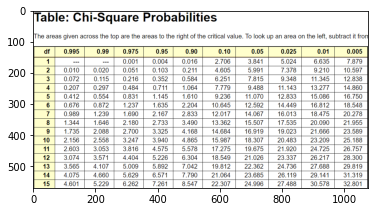

In [61]:
# Python program to read 
# image using matplotlib 

# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

# Read Images 
img = mpimg.imread('C:/Users/nitin/Downloads/Table.png') 

# Output Images 
plt.imshow(img) 

## Considering Confidence interval as 0.995, and performing chi-square test we come to the conclusion that Mass_Density is not significant enough to estimate the Severity.

In [62]:
data.drop('Mass_Density',axis=1,inplace=True)

In [63]:
data

,BI_RADS,Age,Shape,Margin,Severity
0,5.0,67.0,lobular,spiculated,1
1,4.0,43.0,round,circumscribed,1
2,5.0,58.0,irregular,spiculated,1
3,4.0,28.0,round,circumscribed,0
4,5.0,74.0,round,spiculated,1
...,...,...,...,...,...
956,4.0,47.0,oval,circumscribed,0
957,4.0,56.0,irregular,spiculated,1
958,4.0,64.0,irregular,spiculated,0
959,5.0,66.0,irregular,spiculated,1


In [64]:
data['Margin'].isna().sum()

0

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [66]:
def model_evaluation(y_test, y_preds, model_name):
    
    accuracy = accuracy_score(y_test, y_preds) * 100
    print("************ Accuracy Score ************")
    print(accuracy)
    print("\n\n************ Classification Report ************")
    print(classification_report(y_test, y_preds))
    print("\n\n************ roc_auc_score ************")
    print(roc_auc_score(y_test,y_preds))
    print("\n\n************ Confusion Matrix ************")
    sns.heatmap(confusion_matrix(y_preds, y_test), annot = True, fmt = ".0f", cmap = "YlGnBu")
    plt.title("{} Validation Matrix\n\n".format(model_name))
    return accuracy

In [67]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Shape'] = labelencoder.fit_transform(data['Shape'])
data['Margin'] = labelencoder.fit_transform(data['Margin'])

In [68]:
X = data.drop("Severity", axis=1)
Y = data["Severity"]

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
data['Shape']

0      1
1      3
2      0
3      3
4      3
      ..
956    2
957    0
958    0
959    0
960    1
Name: Shape, Length: 922, dtype: int32

In [71]:
data['Margin']

0      4
1      0
2      4
3      0
4      4
      ..
956    0
957    4
958    4
959    4
960    3
Name: Margin, Length: 922, dtype: int32

In [72]:
data.head()

,BI_RADS,Age,Shape,Margin,Severity
0,5.0,67.0,1,4,1
1,4.0,43.0,3,0,1
2,5.0,58.0,0,4,1
3,4.0,28.0,3,0,0
4,5.0,74.0,3,4,1


************ Accuracy Score ************
84.86486486486487


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       103
           1       0.83      0.83      0.83        82

    accuracy                           0.85       185
   macro avg       0.85      0.85      0.85       185
weighted avg       0.85      0.85      0.85       185



************ roc_auc_score ************
0.8466729812929197


************ Confusion Matrix ************


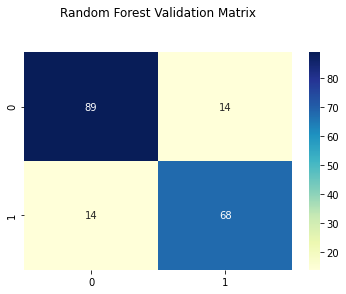

In [73]:
# Applying Random forest with max_depth = 5 and criterion = entropy
random_forest_model = RandomForestClassifier(criterion="entropy", max_depth=5)
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)
rf_accuracy = model_evaluation(y_test, random_forest_pred, "Random Forest")

************ Accuracy Score ************
84.32432432432432


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       103
           1       0.82      0.83      0.82        82

    accuracy                           0.84       185
   macro avg       0.84      0.84      0.84       185
weighted avg       0.84      0.84      0.84       185



************ roc_auc_score ************
0.8418186123608808


************ Confusion Matrix ************


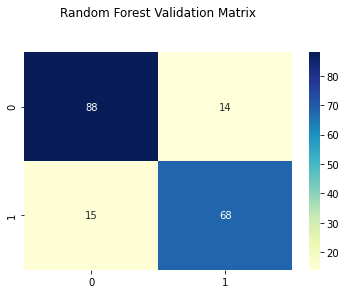

In [74]:
# Changing the max_depth value 4 and using criterion = "gini" gives better accuracy

random_forest_model = RandomForestClassifier(criterion="gini", max_depth=4)
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)
rf_accuracy = model_evaluation(y_test, random_forest_pred, "Random Forest")

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

************ Accuracy Score ************
80.0


************ Classification Report ************
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       103
           1       0.80      0.73      0.76        82

    accuracy                           0.80       185
   macro avg       0.80      0.79      0.80       185
weighted avg       0.80      0.80      0.80       185



************ roc_auc_score ************
0.7930381245560029


************ Confusion Matrix ************


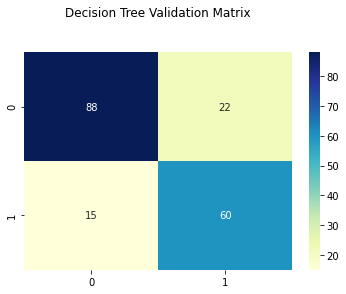

In [77]:
dt_accuracy = model_evaluation(y_test, y_pred, "Decision Tree")

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [79]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)

In [80]:
rf_Model = RandomForestClassifier()

In [81]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [82]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   31.5s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   44.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [83]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 33}

In [84]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.848
Test Accuracy - : 0.843
